# Promedio Móvil (Moving Average)

## Introducción

El **promedio móvil (Moving Average, MA)** es una herramienta estadística comúnmente utilizada en el análisis de series temporales. Se utiliza para suavizar las fluctuaciones de los datos, proporcionando una visión más clara de las tendencias a largo plazo y eliminando el "ruido" en los datos. Como **Data Scientist**, comprender cómo y cuándo aplicar promedios móviles es esencial para el análisis de datos, predicción y toma de decisiones basadas en series temporales.

---

## 1. ¿Qué es el Promedio Móvil (Moving Average)?

Un **promedio móvil** es una técnica de suavizado que calcula la media de un conjunto de valores en una ventana temporal (o de datos) deslizante. A medida que se mueve la ventana a lo largo de los datos, se recalcula el promedio para el nuevo conjunto de puntos.

### **Fórmula:**

El **promedio móvil simple (SMA, por sus siglas en inglés)** de una serie temporal $ x_t $ en el tiempo $ t $, usando una ventana de tamaño $ k $, se calcula como:

$$
SMA_t = \frac{1}{k} \sum_{i=t-k+1}^{t} x_i
$$

Donde:
- $ x_i $: El valor de la serie temporal en el punto $ i $.
- $ k $: El tamaño de la ventana.
- $ t $: El punto temporal actual.

---

## 2. Tipos de Promedios Móviles

### **Promedio Móvil Simple (SMA - Simple Moving Average)**

El **SMA** calcula el promedio de un número fijo de puntos consecutivos en la serie temporal. Es el tipo de promedio móvil más sencillo y se utiliza ampliamente para suavizar fluctuaciones a corto plazo y capturar tendencias generales.

**Uso común:**
- Identificar tendencias en datos con fluctuaciones aleatorias (por ejemplo, precios de acciones).

### **Promedio Móvil Exponencial (EMA - Exponential Moving Average)**

El **EMA** otorga más peso a los datos más recientes, lo que lo hace más sensible a los cambios recientes en los datos. Es útil cuando se quiere dar mayor importancia a los eventos más cercanos en el tiempo.

**Fórmula del EMA:**

$$
EMA_t = \alpha x_t + (1 - \alpha) EMA_{t-1}
$$

Donde:
- $ \alpha = \frac{2}{k + 1} $ es el factor de suavizado.

**Uso común:**
- Análisis de mercados financieros, predicción de ventas, y procesos en tiempo real donde se priorizan los eventos más recientes.

### **Promedio Móvil Ponderado (WMA - Weighted Moving Average)**

El **WMA** asigna un peso específico a cada dato dentro de la ventana, en lugar de tratarlos por igual. Este tipo de promedio es útil cuando algunos puntos de datos son más relevantes que otros, pero no se desea la influencia tan fuerte como en el EMA.

---

## 3. ¿Por qué es útil?

### **Aplicaciones principales en datos:**

1. **Detección de tendencias y patrones**:
   - Los promedios móviles ayudan a suavizar datos ruidosos y a resaltar tendencias o ciclos en series temporales.
   - Ejemplo: Identificar tendencias de ventas a lo largo del tiempo.

2. **Pronóstico y Predicción**:
   - Se usan para prever valores futuros en modelos predictivos, especialmente cuando los datos presentan fluctuaciones cíclicas.
   - Ejemplo: Predicción de demanda o tráfico web.

3. **Análisis de series temporales**:
   - Los promedios móviles son útiles en la descomposición de series temporales para extraer la componente de tendencia y eliminar el ruido.
   - Ejemplo: Analizar el rendimiento de una campaña publicitaria.

4. **Filtrado de datos**:
   - Ayudan a reducir el ruido y mejorar la calidad de los datos de entrada para otros modelos o algoritmos.
   - Ejemplo: Filtrar datos de sensores para mejorar la precisión de los modelos de predicción.

---

## 4. Ejemplo práctico con Promedio Móvil en Python

### **Cargar datos y preparar el entorno**

Supongamos que tienes datos de ventas diarias para una tienda en línea. A continuación, se aplica un promedio móvil simple y un promedio móvil exponencial.

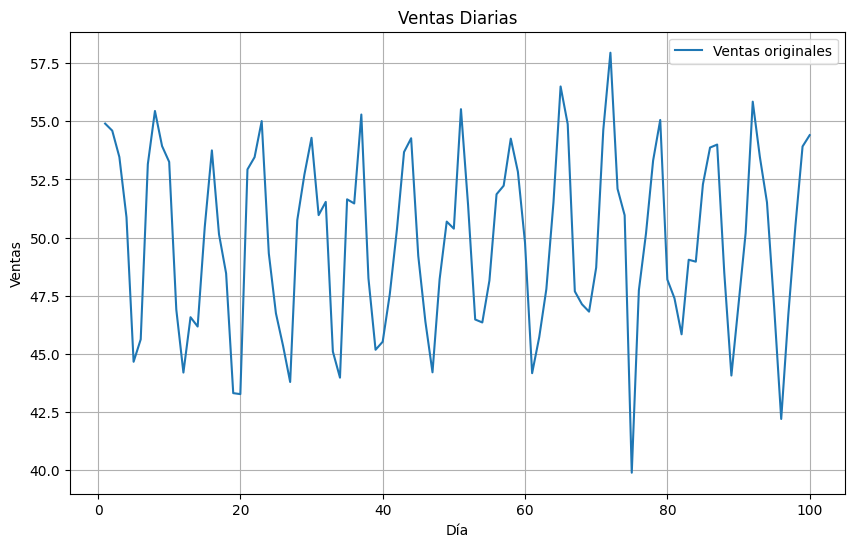

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos simulados de ventas diarias
np.random.seed(42)
days = np.arange(1, 101)
sales = 50 + 5 * np.sin(2 * np.pi * days / 7) + np.random.normal(0, 2, len(days))  # Datos con tendencia semanal

# Crear DataFrame
df = pd.DataFrame({'day': days, 'sales': sales})

# Graficar la serie original
plt.figure(figsize=(10, 6))
plt.plot(df['day'], df['sales'], label="Ventas originales")
plt.title("Ventas Diarias")
plt.xlabel("Día")
plt.ylabel("Ventas")
plt.grid(True)
plt.legend()
plt.show()

### Aplicar Promedio Móvil Simple (SMA)

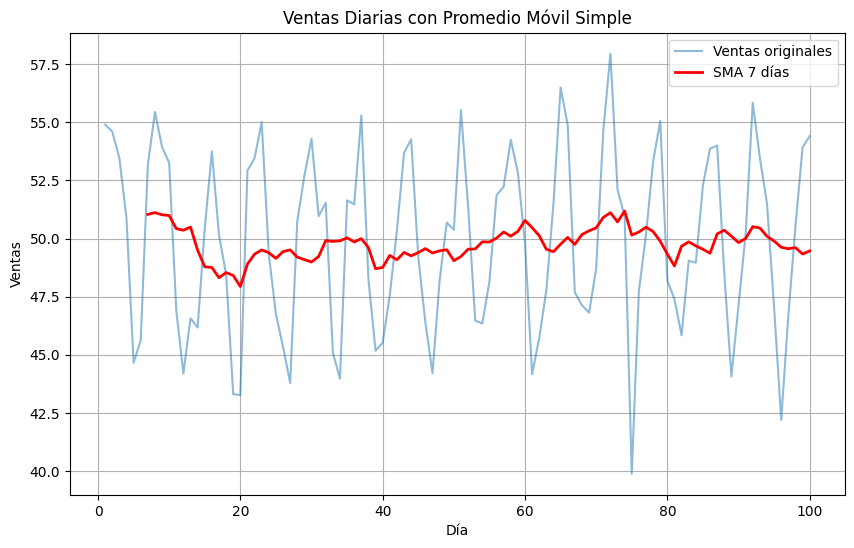

In [2]:
# Calcular el promedio móvil simple (SMA) con una ventana de 7 días
window_size = 7
df['SMA'] = df['sales'].rolling(window=window_size).mean()

# Graficar la serie temporal con el SMA
plt.figure(figsize=(10, 6))
plt.plot(df['day'], df['sales'], label="Ventas originales", alpha=0.5)
plt.plot(df['day'], df['SMA'], label=f"SMA {window_size} días", color='red', linewidth=2)
plt.title("Ventas Diarias con Promedio Móvil Simple")
plt.xlabel("Día")
plt.ylabel("Ventas")
plt.grid(True)
plt.legend()
plt.show()

### Aplicar Promedio Móvil Exponencial (EMA)

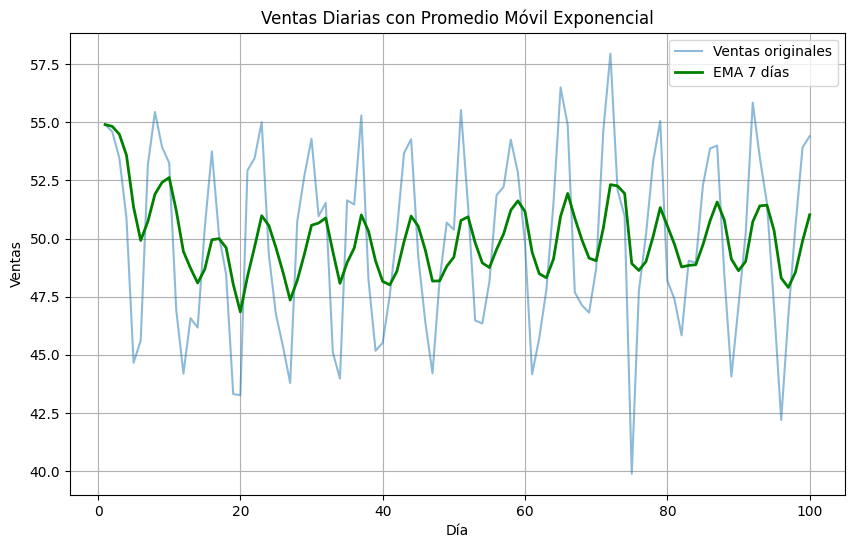

In [3]:
# Calcular el promedio móvil exponencial (EMA) con un factor de suavizado
df['EMA'] = df['sales'].ewm(span=window_size, adjust=False).mean()

# Graficar la serie temporal con el EMA
plt.figure(figsize=(10, 6))
plt.plot(df['day'], df['sales'], label="Ventas originales", alpha=0.5)
plt.plot(df['day'], df['EMA'], label=f"EMA {window_size} días", color='green', linewidth=2)
plt.title("Ventas Diarias con Promedio Móvil Exponencial")
plt.xlabel("Día")
plt.ylabel("Ventas")
plt.grid(True)
plt.legend()
plt.show()

## Comparación de los Resultados
En el gráfico generado, verás cómo tanto el SMA como el EMA suavizan las fluctuaciones de las ventas diarias, pero el EMA responde más rápidamente a los cambios recientes debido a su mayor peso en los valores más recientes.

### 5. Consejos Prácticos y Consideraciones
1. SMA vs EMA:

    - SMA es más simple y útil cuando las fluctuaciones son más suaves o cuando no te importa priorizar los datos más recientes.
    - EMA es más útil cuando los datos son más volátiles y necesitas que el modelo responda más rápidamente a cambios recientes.
2. Ajuste de la ventana:

    - Una ventana más pequeña (menos días) captura cambios más rápidos, pero puede ser ruidosa.
    - Una ventana más grande suaviza los datos, pero podría perder detalles importantes.
3. Uso en Modelos Predictivos:

    - Los promedios móviles se pueden usar como características adicionales en modelos predictivos (por ejemplo, en modelos de regresión o redes neuronales) para capturar la tendencia.